In [1]:
import numpy as np
import pandas as pd

In [9]:
titanic = pd.read_csv('train.csv',header = 0,dtype={'Age':np.float64})

In [12]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic.drop('Name',axis=1,inplace=True)

In [15]:
del titanic['Ticket']

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [18]:
del titanic['Fare']

In [19]:
del titanic['Cabin']

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [21]:
def getNumber(str):
    if str == ('male'):
        return 1
    else:
        return 2

In [23]:
titanic['Gender'] = titanic['Sex'].apply(getNumber)

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [26]:
titanic.drop('Sex',axis=1,inplace=True)

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       889 non-null object
Gender         891 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB


In [30]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [33]:
means = titanic[titanic.Survived==1].Age.mean()

In [34]:
means

28.343689655172415

In [38]:
titanic['age'] = np.where(pd.isnull(titanic.Age)&titanic.Survived==1,means,titanic['Age'])

In [42]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age            125
dtype: int64

In [43]:
meaNS = titanic[titanic.Survived==0].Age.mean()

In [44]:
meaNS

30.62617924528302

In [45]:
titanic.age.fillna(meaNS,inplace=True)

In [48]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age              0
dtype: int64

In [49]:
del titanic['Age']

In [50]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [56]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived==1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived==1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived==1].shape[0]
print(survivedQ)
print(survivedS)
print(survivedC)

30
217
93


C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived==0].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived==0].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived==0].shape[0]
print(survivedQ)
print(survivedS)
print(survivedC)

47
427
75


C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
titanic.dropna(inplace=True)

In [60]:
titanic.tail()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
886,887,0,2,0,0,S,1,27.000000
887,888,1,1,0,0,S,2,19.000000
888,889,0,3,1,2,S,2,30.626179
889,890,1,1,0,0,C,1,26.000000
890,891,0,3,0,0,Q,1,32.000000


In [61]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [69]:
titanic.rename(columns={'Genger':'Sex'}, inplace=True)

In [70]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [72]:
def getEmb(str):
    if str == 'S':
        return 1
    elif str == 'C':
        return 2
    else:
        return 3
    
titanic['Embark'] = titanic['Embarked'].apply(getEmb)

In [73]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,age,Embark
0,1,0,3,1,0,S,1,22.0,1
1,2,1,1,1,0,C,2,38.0,2
2,3,1,3,0,0,S,2,26.0,1
3,4,1,1,1,0,S,2,35.0,1
4,5,0,3,0,0,S,1,35.0,1


In [74]:
del titanic['Embarked']

In [75]:
titanic.rename(columns={'Embark':'Embarked'}, inplace=True)

In [76]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,age,Embarked
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,2
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


In [78]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style

In [84]:
males = (titanic['Sex']==1).sum()

In [85]:
females = (titanic['Sex']==2).sum()

In [86]:
print(males,females)

577 312


In [87]:
MalesS = titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
MalesN = titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
FemalesS = titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
FemalesN = titanic[titanic.Sex==2][titanic.Survived==0].shape[0]

C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dinesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [89]:
print(MalesS,FemalesS,MalesN,FemalesN)

109 231 468 81


In [90]:
chart = [MalesS,FemalesS,MalesN,FemalesN]

In [91]:
colors = ['green','yellow','orange','pink']

In [94]:
labels = ['Survived Males', 'Survived Females','Not Survived Males','Not survived females']

In [107]:
explode = [0,0.05,0,0.1]

<function matplotlib.pyplot.show(*args, **kw)>

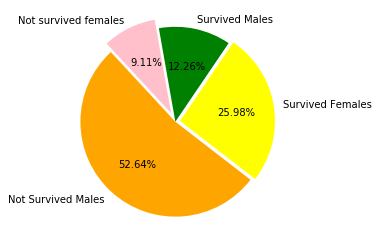

In [108]:
plt.pie(chart,labels = labels,colors = colors,explode = explode,startangle = 100,counterclock = False,autopct="%0.2f%%")
plt.axis("equal")
plt.show